# Online Retail Customer Segmentation Analysis

Import the necessary libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
import scipy 
import scipy.stats as stats
import matplotlib.mlab as mlab

In [2]:
# Import the dataset
data = pd.read_csv('OnlineRetail (2).csv', encoding='ISO-8859-1')
data

InvoiceNo StockCode                          Description  Quantity  \
0         536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1         536365     71053                  WHITE METAL LANTERN         6   
2         536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3         536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4         536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   
...          ...       ...                                  ...       ...   
541904    581587     22613          PACK OF 20 SPACEBOY NAPKINS        12   
541905    581587     22899         CHILDREN'S APRON DOLLY GIRL          6   
541906    581587     23254        CHILDRENS CUTLERY DOLLY GIRL          4   
541907    581587     23255      CHILDRENS CUTLERY CIRCUS PARADE         4   
541908    581587     22138        BAKING SET 9 PIECE RETROSPOT          3   

            InvoiceDate  UnitPrice  CustomerID         Country  
0        12/1/2010 8:26       2.55     17850.0  United Kingdom  
1        12/1/2010 8:26       3.39     17850.0  United Kingdom  
2        12/1/2010 8:26       2.75     17850.0  United Kingdom  
3        12/1/2010 8:26       3.39     17850.0  United Kingdom  
4        12/1/2010 8:26       3.39     17850.0  United Kingdom  
...                 ...        ...         ...             ...  
541904  12/9/2011 12:50       0.85     12680.0          France  
541905  12/9/2011 12:50       2.10     12680.0          France  
541906  12/9/2011 12:50       4.15     12680.0          France  
541907  12/9/2011 12:50       4.15     12680.0          France  
541908  12/9/2011 12:50       4.95     12680.0          France  

[541909 rows x 8 columns]

In [3]:
data.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [4]:
d = data[data.Description == '?']
d.shape

(47, 8)

In [5]:
data.dropna(inplace = True)

In [6]:
data.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 406829 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    406829 non-null  object 
 1   StockCode    406829 non-null  object 
 2   Description  406829 non-null  object 
 3   Quantity     406829 non-null  int64  
 4   InvoiceDate  406829 non-null  object 
 5   UnitPrice    406829 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      406829 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 27.9+ MB


In [8]:
data['CustomerID'].value_counts()

CustomerID
17841.0    7983
14911.0    5903
14096.0    5128
12748.0    4642
14606.0    2782
           ... 
15070.0       1
15753.0       1
17065.0       1
16881.0       1
16995.0       1
Name: count, Length: 4372, dtype: int64

In [9]:
data.CustomerID.unique().shape

(4372,)

In [10]:
(data.CustomerID.value_counts()/sum(data.CustomerID.value_counts())*100).head(15).cumsum()

CustomerID
17841.0     1.962249
14911.0     3.413228
14096.0     4.673708
12748.0     5.814728
14606.0     6.498553
15311.0     7.110850
14646.0     7.623350
13089.0     8.079807
13263.0     8.492020
14298.0     8.895138
15039.0     9.265809
14156.0     9.614850
18118.0     9.930462
14159.0    10.228376
14796.0    10.514737
Name: count, dtype: float64

In [11]:
data.Country.value_counts().reset_index()

Country   count
0         United Kingdom  361878
1                Germany    9495
2                 France    8491
3                   EIRE    7485
4                  Spain    2533
5            Netherlands    2371
6                Belgium    2069
7            Switzerland    1877
8               Portugal    1480
9              Australia    1259
10                Norway    1086
11                 Italy     803
12       Channel Islands     758
13               Finland     695
14                Cyprus     622
15                Sweden     462
16               Austria     401
17               Denmark     389
18                 Japan     358
19                Poland     341
20                   USA     291
21                Israel     250
22           Unspecified     244
23             Singapore     229
24               Iceland     182
25                Canada     151
26                Greece     146
27                 Malta     127
28  United Arab Emirates      68
29    European Community      61
30                   RSA      58
31               Lebanon      45
32             Lithuania      35
33                Brazil      32
34        Czech Republic      30
35               Bahrain      17
36          Saudi Arabia      10

In [12]:
data.head(5)

InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

      InvoiceDate  UnitPrice  CustomerID         Country  
0  12/1/2010 8:26       2.55     17850.0  United Kingdom  
1  12/1/2010 8:26       3.39     17850.0  United Kingdom  
2  12/1/2010 8:26       2.75     17850.0  United Kingdom  
3  12/1/2010 8:26       3.39     17850.0  United Kingdom  
4  12/1/2010 8:26       3.39     17850.0  United Kingdom

In [13]:
data.Quantity.describe()

count    406829.000000
mean         12.061303
std         248.693370
min      -80995.000000
25%           2.000000
50%           5.000000
75%          12.000000
max       80995.000000
Name: Quantity, dtype: float64

In [14]:
data.UnitPrice.describe()

count    406829.000000
mean          3.460471
std          69.315162
min           0.000000
25%           1.250000
50%           1.950000
75%           3.750000
max       38970.000000
Name: UnitPrice, dtype: float64

In [15]:
des_df=data.groupby(['Description','StockCode']).count().reset_index()
des_df.StockCode.value_counts()[des_df.StockCode.value_counts()>1].reset_index().head()

StockCode  count
0     23236      4
1     23196      4
2     23244      3
3     23126      3
4    17107D      3

In [16]:
data = data[data.Country == 'United Kingdom']
data

InvoiceNo StockCode                          Description  Quantity  \
0         536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1         536365     71053                  WHITE METAL LANTERN         6   
2         536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3         536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4         536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   
...          ...       ...                                  ...       ...   
541889    581585     22466       FAIRY TALE COTTAGE NIGHT LIGHT        12   
541890    581586     22061  LARGE CAKE STAND  HANGING STRAWBERY         8   
541891    581586     23275     SET OF 3 HANGING OWLS OLLIE BEAK        24   
541892    581586     21217        RED RETROSPOT ROUND CAKE TINS        24   
541893    581586     20685                DOORMAT RED RETROSPOT        10   

            InvoiceDate  UnitPrice  CustomerID         Country  
0        12/1/2010 8:26       2.55     17850.0  United Kingdom  
1        12/1/2010 8:26       3.39     17850.0  United Kingdom  
2        12/1/2010 8:26       2.75     17850.0  United Kingdom  
3        12/1/2010 8:26       3.39     17850.0  United Kingdom  
4        12/1/2010 8:26       3.39     17850.0  United Kingdom  
...                 ...        ...         ...             ...  
541889  12/9/2011 12:31       1.95     15804.0  United Kingdom  
541890  12/9/2011 12:49       2.95     13113.0  United Kingdom  
541891  12/9/2011 12:49       1.25     13113.0  United Kingdom  
541892  12/9/2011 12:49       8.95     13113.0  United Kingdom  
541893  12/9/2011 12:49       7.08     13113.0  United Kingdom  

[361878 rows x 8 columns]

In [17]:
data['Amount'] = data.Quantity * data.UnitPrice
data

C:\Users\manoj\AppData\Local\Temp\ipykernel_20880\2464178204.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Amount'] = data.Quantity * data.UnitPrice


InvoiceNo StockCode                          Description  Quantity  \
0         536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1         536365     71053                  WHITE METAL LANTERN         6   
2         536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3         536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4         536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   
...          ...       ...                                  ...       ...   
541889    581585     22466       FAIRY TALE COTTAGE NIGHT LIGHT        12   
541890    581586     22061  LARGE CAKE STAND  HANGING STRAWBERY         8   
541891    581586     23275     SET OF 3 HANGING OWLS OLLIE BEAK        24   
541892    581586     21217        RED RETROSPOT ROUND CAKE TINS        24   
541893    581586     20685                DOORMAT RED RETROSPOT        10   

            InvoiceDate  UnitPrice  CustomerID         Country  Amount  
0        12/1/2010 8:26       2.55     17850.0  United Kingdom   15.30  
1        12/1/2010 8:26       3.39     17850.0  United Kingdom   20.34  
2        12/1/2010 8:26       2.75     17850.0  United Kingdom   22.00  
3        12/1/2010 8:26       3.39     17850.0  United Kingdom   20.34  
4        12/1/2010 8:26       3.39     17850.0  United Kingdom   20.34  
...                 ...        ...         ...             ...     ...  
541889  12/9/2011 12:31       1.95     15804.0  United Kingdom   23.40  
541890  12/9/2011 12:49       2.95     13113.0  United Kingdom   23.60  
541891  12/9/2011 12:49       1.25     13113.0  United Kingdom   30.00  
541892  12/9/2011 12:49       8.95     13113.0  United Kingdom  214.80  
541893  12/9/2011 12:49       7.08     13113.0  United Kingdom   70.80  

[361878 rows x 9 columns]

In [18]:
data = data[data.Amount>0]

In [19]:
data

InvoiceNo StockCode                          Description  Quantity  \
0         536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1         536365     71053                  WHITE METAL LANTERN         6   
2         536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3         536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4         536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   
...          ...       ...                                  ...       ...   
541889    581585     22466       FAIRY TALE COTTAGE NIGHT LIGHT        12   
541890    581586     22061  LARGE CAKE STAND  HANGING STRAWBERY         8   
541891    581586     23275     SET OF 3 HANGING OWLS OLLIE BEAK        24   
541892    581586     21217        RED RETROSPOT ROUND CAKE TINS        24   
541893    581586     20685                DOORMAT RED RETROSPOT        10   

            InvoiceDate  UnitPrice  CustomerID         Country  Amount  
0        12/1/2010 8:26       2.55     17850.0  United Kingdom   15.30  
1        12/1/2010 8:26       3.39     17850.0  United Kingdom   20.34  
2        12/1/2010 8:26       2.75     17850.0  United Kingdom   22.00  
3        12/1/2010 8:26       3.39     17850.0  United Kingdom   20.34  
4        12/1/2010 8:26       3.39     17850.0  United Kingdom   20.34  
...                 ...        ...         ...             ...     ...  
541889  12/9/2011 12:31       1.95     15804.0  United Kingdom   23.40  
541890  12/9/2011 12:49       2.95     13113.0  United Kingdom   23.60  
541891  12/9/2011 12:49       1.25     13113.0  United Kingdom   30.00  
541892  12/9/2011 12:49       8.95     13113.0  United Kingdom  214.80  
541893  12/9/2011 12:49       7.08     13113.0  United Kingdom   70.80  

[354321 rows x 9 columns]

In [20]:
import datetime

In [41]:
data.loc[:,'InvoiceDate'] = pd.to_datetime(data['InvoiceDate'])

Create the RFM model (Recency, Frequency,Monetary value)

Recency

To create a Recency feature variable, we need to decide the reference date for analysis and we wil define the reference date as one day before the last transaction.

In [43]:
reference_date = data.InvoiceDate.max()
reference_date = reference_date + datetime.timedelta(days = 1)
print(data.InvoiceDate.max(), data.InvoiceDate.min())
reference_date

2011-12-09 12:49:00 2010-12-01 08:26:00


Timestamp('2011-12-10 12:49:00')

In [56]:
data.loc[:,'days_since_last_purchase']=reference_date-data.InvoiceDate
data.loc[:,'Days Since Last Purchase NUm']=data['days_since_last_purchase'].dt.days
data['Days Since Last Purchase NUm'].head()  

C:\Users\manoj\AppData\Local\Temp\ipykernel_20880\2545902029.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.loc[:,'Days Since Last Purchase NUm']=data['days_since_last_purchase'].dt.days


0    374
1    374
2    374
3    374
4    374
Name: Days Since Last Purchase NUm, dtype: int64

In [57]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 354321 entries, 0 to 541893
Data columns (total 13 columns):
 #   Column                        Non-Null Count   Dtype          
---  ------                        --------------   -----          
 0   InvoiceNo                     354321 non-null  object         
 1   StockCode                     354321 non-null  object         
 2   Description                   354321 non-null  object         
 3   Quantity                      354321 non-null  int64          
 4   InvoiceDate                   354321 non-null  datetime64[ns] 
 5   UnitPrice                     354321 non-null  float64        
 6   CustomerID                    354321 non-null  float64        
 7   Country                       354321 non-null  object         
 8   Amount                        354321 non-null  float64        
 9   Days Since Last Purchase      354321 non-null  object         
 10  days_since_last_purchase      354321 non-null  timedelta64[ns]
 11  days_

In [62]:
data

InvoiceNo StockCode                          Description  Quantity  \
0         536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1         536365     71053                  WHITE METAL LANTERN         6   
2         536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3         536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4         536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   
...          ...       ...                                  ...       ...   
541889    581585     22466       FAIRY TALE COTTAGE NIGHT LIGHT        12   
541890    581586     22061  LARGE CAKE STAND  HANGING STRAWBERY         8   
541891    581586     23275     SET OF 3 HANGING OWLS OLLIE BEAK        24   
541892    581586     21217        RED RETROSPOT ROUND CAKE TINS        24   
541893    581586     20685                DOORMAT RED RETROSPOT        10   

               InvoiceDate  UnitPrice  CustomerID         Country  Amount  \
0      2010-12-01 08:26:00       2.55     17850.0  United Kingdom   15.30   
1      2010-12-01 08:26:00       3.39     17850.0  United Kingdom   20.34   
2      2010-12-01 08:26:00       2.75     17850.0  United Kingdom   22.00   
3      2010-12-01 08:26:00       3.39     17850.0  United Kingdom   20.34   
4      2010-12-01 08:26:00       3.39     17850.0  United Kingdom   20.34   
...                    ...        ...         ...             ...     ...   
541889 2011-12-09 12:31:00       1.95     15804.0  United Kingdom   23.40   
541890 2011-12-09 12:49:00       2.95     13113.0  United Kingdom   23.60   
541891 2011-12-09 12:49:00       1.25     13113.0  United Kingdom   30.00   
541892 2011-12-09 12:49:00       8.95     13113.0  United Kingdom  214.80   
541893 2011-12-09 12:49:00       7.08     13113.0  United Kingdom   70.80   

       Days Since Last Purchase  Days Since Last Purchase NUm  
0             374 days 04:23:00                           374  
1             374 days 04:23:00                           374  
2             374 days 04:23:00                           374  
3             374 days 04:23:00                           374  
4             374 days 04:23:00                           374  
...                         ...                           ...  
541889          1 days 00:18:00                             1  
541890          1 days 00:00:00                             1  
541891          1 days 00:00:00                             1  
541892          1 days 00:00:00                             1  
541893          1 days 00:00:00                             1  

[354321 rows x 11 columns]

In [63]:
customer_history_data = data.groupby('CustomerID').min().reset_index()[['CustomerID', 'Days Since Last Purchase NUm']]
customer_history_data .rename(columns = {'Days Since Last Purchase NUm' : 'Recency'}, inplace = True)
print(customer_history_data.describe())
customer_history_data

         CustomerID      Recency
count   3920.000000  3920.000000
mean   15562.059694    92.208418
std     1576.594671    99.533854
min    12346.000000     1.000000
25%    14208.750000    18.000000
50%    15569.500000    51.000000
75%    16913.250000   143.000000
max    18287.000000   374.000000


CustomerID  Recency
0        12346.0      326
1        12747.0        2
2        12748.0        1
3        12749.0        4
4        12820.0        3
...          ...      ...
3915     18280.0      278
3916     18281.0      181
3917     18282.0        8
3918     18283.0        4
3919     18287.0       43

[3920 rows x 2 columns]

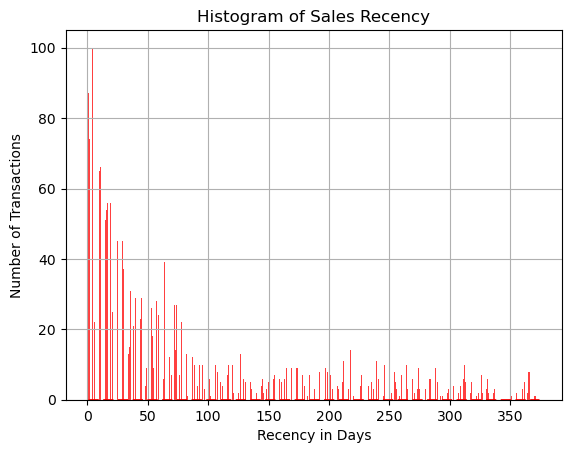

In [64]:
x = customer_history_data.Recency
mu = np.mean(x)
sigma = math.sqrt(np.var(x))
n, bins , patches = plt.hist(x ,1000, facecolor = 'red', alpha = 0.75 )

y = scipy.stats.norm.pdf(bins, mu, sigma)
l = plt.plot(bins, y , 'r--', lw = 2)

plt.xlabel('Recency in Days')
plt.ylabel('Number of Transactions')
plt.title('Histogram of Sales Recency')
plt.grid(True)
plt.show()

In [65]:
customer_monetary_val = data[['CustomerID' , 'Amount']].groupby('CustomerID').sum().reset_index()
customer_history_data=customer_history_data.merge(customer_monetary_val,how='outer')
customer_history_data.Amount=customer_history_data.Amount+0.001
customer_freq= data[['CustomerID','Amount']].groupby('CustomerID').count().reset_index()
customer_freq.rename(columns={'Amount':'Frequency'},inplace=True)
customer_history_data=customer_history_data.merge(customer_freq,how='outer')

customer_history_data=pd.DataFrame(customer_history_data,columns=['CustomerID','Recency','Amount','Frequency'])
customer_history_data.head()

CustomerID  Recency     Amount  Frequency
0     12346.0      326  77183.601          1
1     12747.0        2   4196.011        103
2     12748.0        1  33719.731       4595
3     12749.0        4   4090.881        199
4     12820.0        3    942.341         59

In [66]:
from sklearn import preprocessing

In [67]:
customer_history_data['Recency Log'] = customer_history_data['Recency'].apply(math.log)
customer_history_data['Amount Log'] = customer_history_data['Amount'].apply(math.log)
customer_history_data['Frequency Log'] = customer_history_data['Frequency'].apply(math.log)
feature_vector=['Recency Log','Frequency Log','Amount Log']
X=customer_history_data[feature_vector].values
scaler=preprocessing.StandardScaler()
X_scaled=scaler.fit_transform(X)

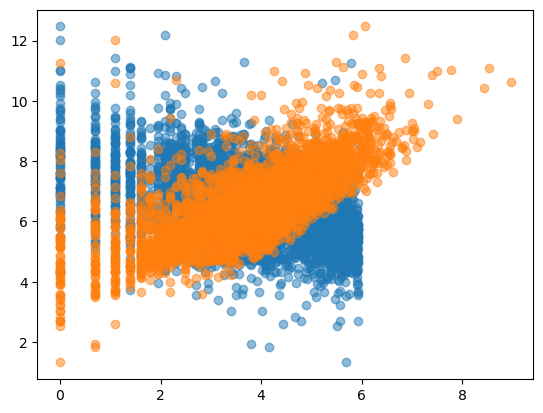

In [69]:
plt.scatter(customer_history_data['Recency Log'] , customer_history_data['Amount Log'] , alpha = 0.5)
plt.scatter(customer_history_data['Frequency Log'] , customer_history_data['Amount Log'] , alpha = 0.5)


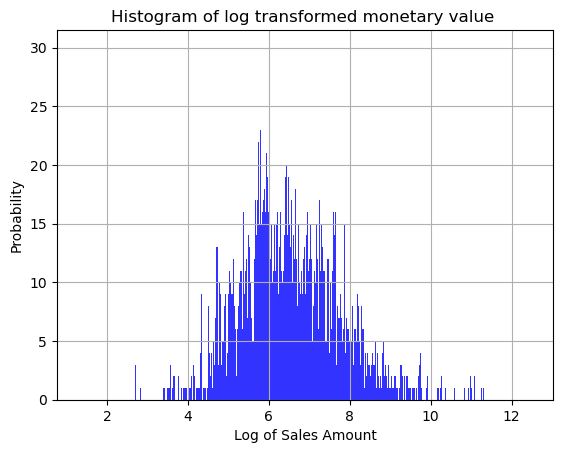

In [70]:
x=customer_history_data['Amount Log']
n,bins,patches=plt.hist(x,1000,facecolor='b',alpha=0.8)
plt.xlabel('Log of Sales Amount')
plt.ylabel('Probability')
plt.title('Histogram of log transformed monetary value ')
plt.grid(True)
plt.show()

In [71]:
from mpl_toolkits.mplot3d import Axes3D

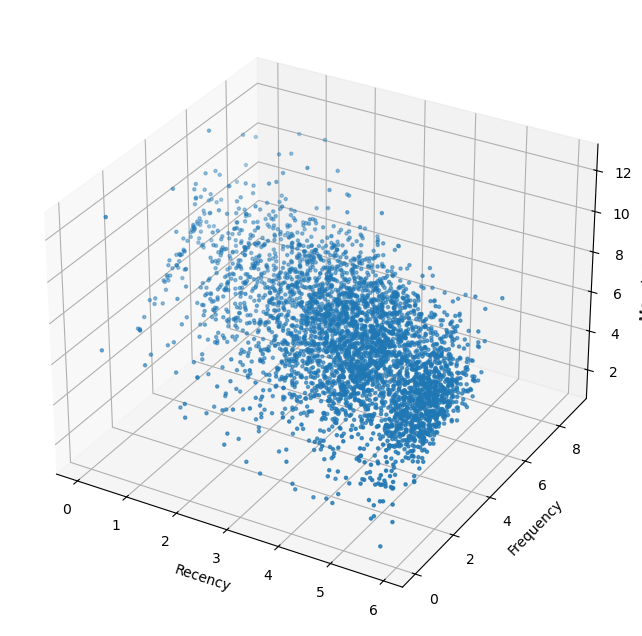

In [76]:
fig =  plt.figure(figsize = (10,8))
ax=fig.add_subplot(111,projection='3d')
xs=customer_history_data['Recency Log']
ys=customer_history_data['Frequency Log']
zs=customer_history_data['Amount Log']
ax.scatter(xs,ys,zs,s=5)
ax.set_xlabel('Recency')
ax.set_ylabel('Frequency')
ax.set_zlabel('Monetary value')
plt.show()

C:\Users\manoj\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\manoj\AppData\Local\Temp\ipykernel_20880\3161729431.py:29: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap("Spectral")


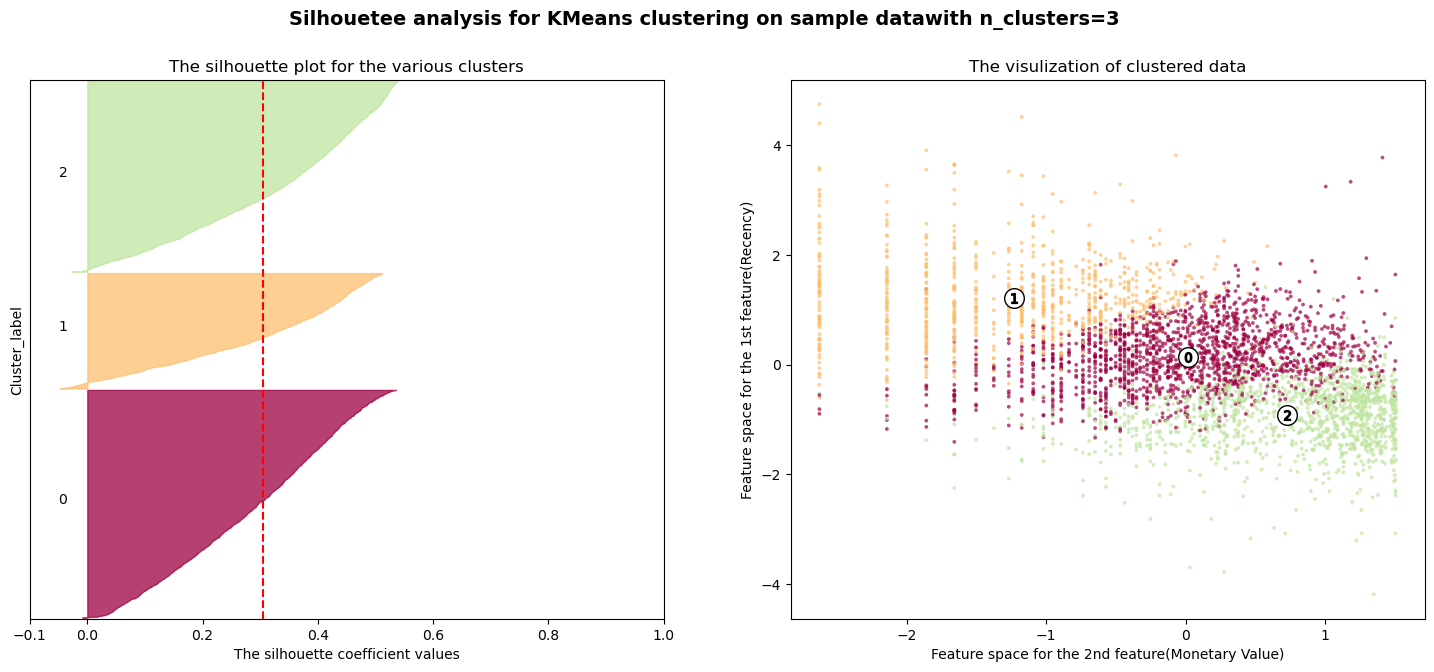

C:\Users\manoj\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\manoj\AppData\Local\Temp\ipykernel_20880\3161729431.py:29: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap("Spectral")


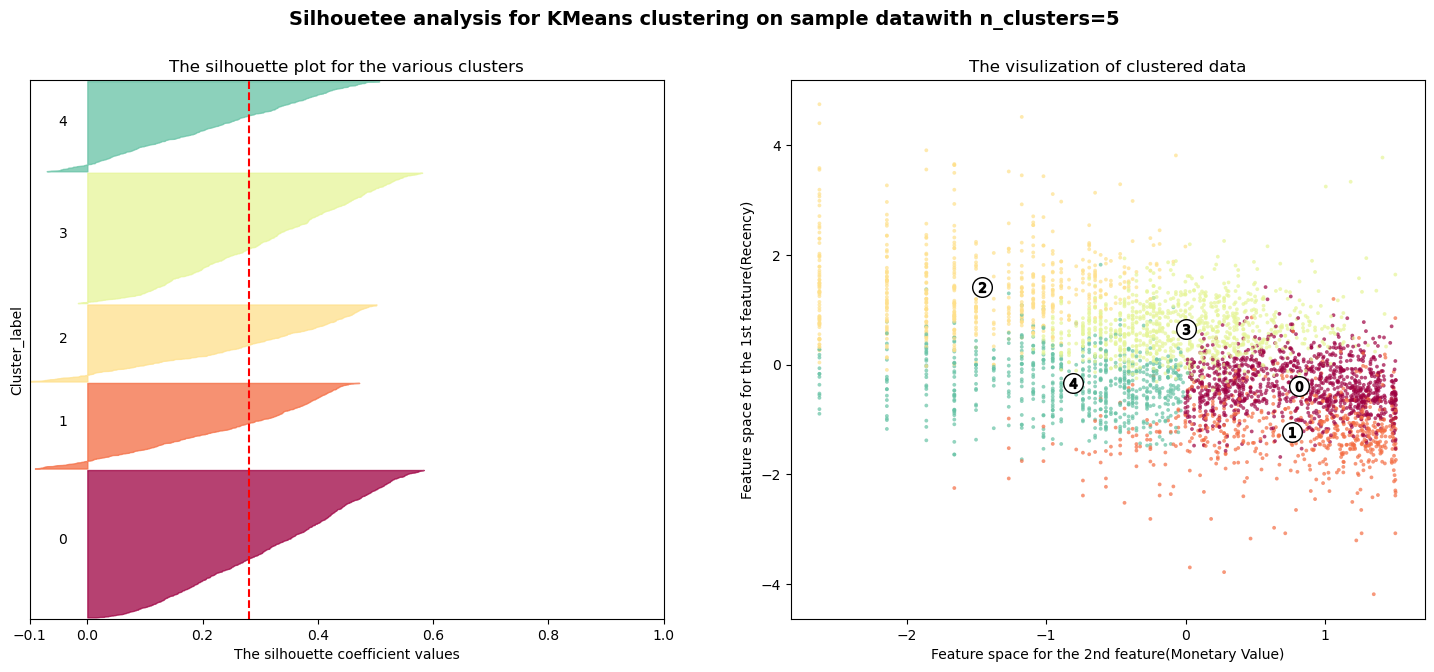

In [77]:
from sklearn.cluster import KMeans
import matplotlib.cm as cm
from sklearn.metrics import silhouette_samples,silhouette_score
X=X_scaled
cluster_centers=dict()
for n_clusters in range(3,6,2):
    fig,(ax1,ax2)=plt.subplots(1,2)
    fig.set_size_inches(18,7)
    ax1.set_xlim([-0.1,1])
    ax1.set_ylim([0,len(X)+(n_clusters+1)*10])
    
    clusterer=KMeans(n_clusters=n_clusters,random_state=10)
    cluster_labels=clusterer.fit_predict(X)
    
    silhouette_avg=silhouette_score(X,cluster_labels)
    cluster_centers.update({n_clusters:{'cluster_centre':clusterer.cluster_centers_,
                                       'silhouette_score':silhouette_avg,
                                       'labels':cluster_labels}
                           })
    
    sample_silhouette_values=silhouette_samples(X,cluster_labels)
    y_lower=10
    for i in range(n_clusters):
        ith_cluster_silhouette_values=sample_silhouette_values[cluster_labels==i]
        ith_cluster_silhouette_values.sort()
        size_cluster_i=ith_cluster_silhouette_values.shape[0]
        y_upper=y_lower+size_cluster_i
    
        cmap = cm.get_cmap("Spectral")
        color=cmap(float(i)/n_clusters)
        ax1.fill_betweenx(np.arange(y_lower,y_upper),0,
                ith_cluster_silhouette_values,facecolor=color,edgecolor=color,alpha=0.75)
        ax1.text(-0.05,y_lower+0.5*size_cluster_i,str(i))
        y_lower=y_upper+10 # 10 for 0 samples
        
    ax1.set_title('The silhouette plot for the various clusters')
    ax1.set_xlabel('The silhouette coefficient values')
    ax1.set_ylabel('Cluster_label')
    ax1.axvline(x=silhouette_avg,color='red',linestyle='--')
    ax1.set_yticks([])
    ax1.set_xticks([-0.1,0,0.2,0.4,0.6,0.8,1])
    
    colors=cmap(cluster_labels.astype(float)/n_clusters)
    feature1=0
    feature2=2
    ax2.scatter(X[:,feature1],X[:,feature2],marker='.',s=30,
                    lw=0,alpha=0.7,edgecolor='k',c=colors)
    centers=clusterer.cluster_centers_
    ax2.scatter(centers[:,feature1],centers[:,feature2],marker="o",
                   alpha=1,c='white',s=200,edgecolor='k')
    for i,c in enumerate(centers):
        ax2.scatter(c[feature1],c[feature2],marker='$%d$'%i,alpha=1,
                       edgecolor='k',s=50)
    ax2.set_title('The visulization of clustered data')
    ax2.set_xlabel('Feature space for the 2nd feature(Monetary Value)')
    ax2.set_ylabel('Feature space for the 1st feature(Recency)')
    plt.suptitle('Silhouetee analysis for KMeans clustering on sample data' 'with n_clusters=%d'
                         % n_clusters,fontsize=14,fontweight='bold')
    plt.show()

C:\Users\manoj\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\manoj\AppData\Local\Temp\ipykernel_20880\1592486032.py:37: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap=cm.get_cmap('Spectral')


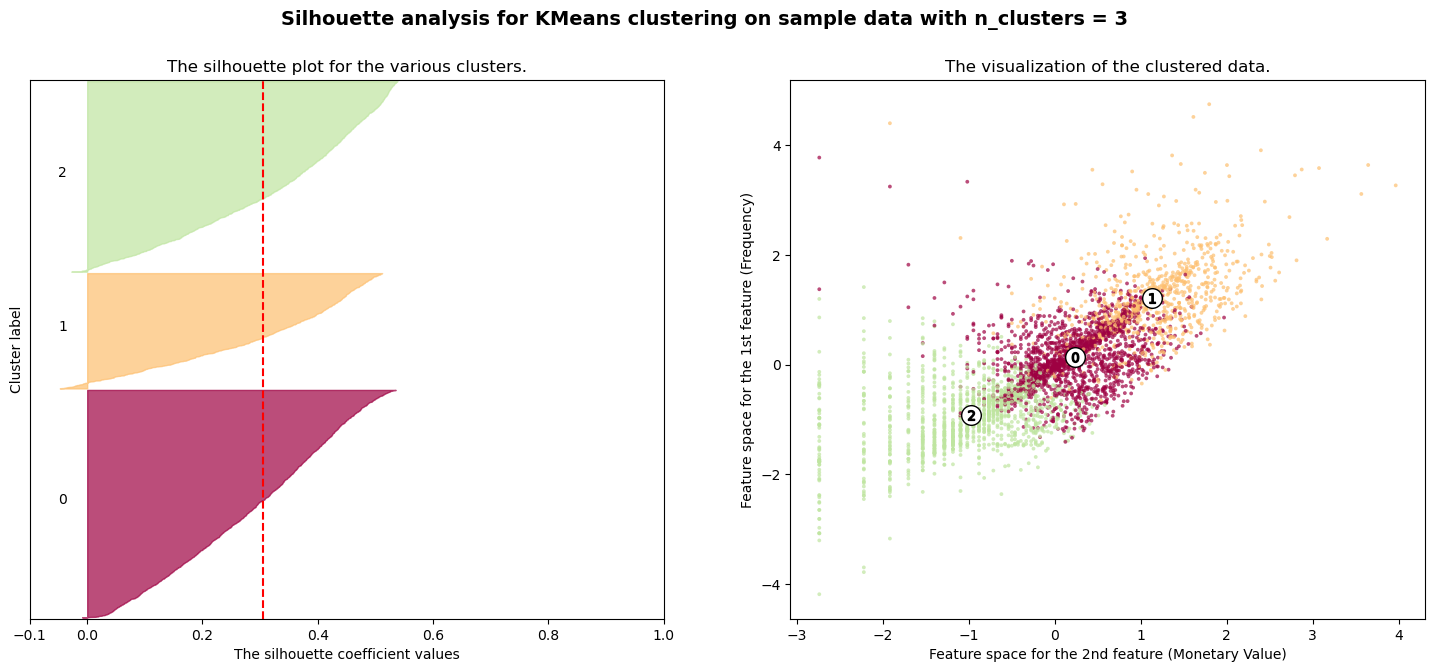

C:\Users\manoj\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\manoj\AppData\Local\Temp\ipykernel_20880\1592486032.py:37: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap=cm.get_cmap('Spectral')


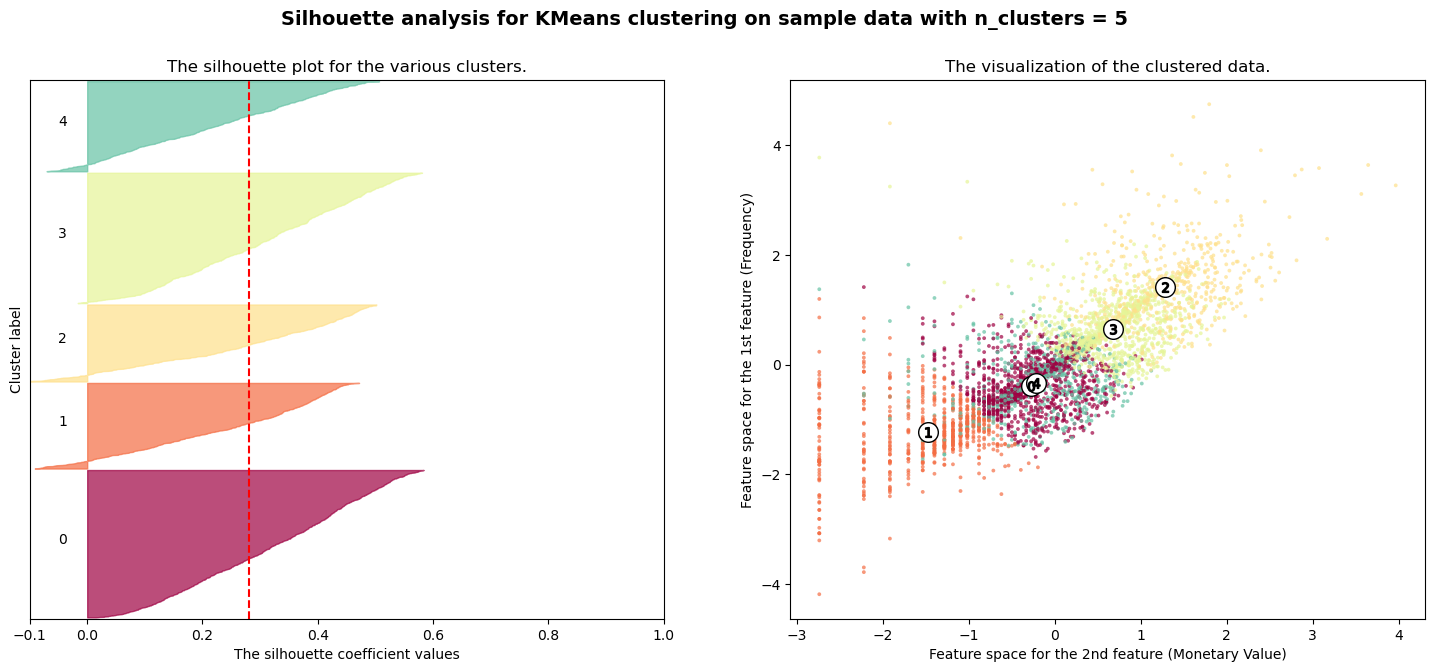

In [78]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm

X = X_scaled

cluster_centers = dict()

for n_clusters in range(3,6,2):
    fig, (ax1, ax2) = plt.subplots(1, 2)
    #ax2 = plt.subplot(111, projection='3d')
    fig.set_size_inches(18, 7)
    ax1.set_xlim([-0.1, 1])
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    silhouette_avg = silhouette_score(X, cluster_labels)
    cluster_centers.update({n_clusters :{
                                        'cluster_center':clusterer.cluster_centers_,
                                        'silhouette_score':silhouette_avg,
                                        'labels':cluster_labels}
                           })

    sample_silhouette_values = silhouette_samples(X, cluster_labels)
    y_lower = 10
    for i in range(n_clusters):
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        cmap=cm.get_cmap('Spectral')
        color = cmap(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")
    ax1.set_yticks([])
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
    
    colors = cmap(cluster_labels.astype(float) / n_clusters)
    feature1 = 1
    feature2 = 2
    ax2.scatter(X[:, feature1], X[:, feature2], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')
    
    centers = clusterer.cluster_centers_
    ax2.scatter(centers[:, feature1], centers[:, feature2], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')
    for i, c in enumerate(centers):
        ax2.scatter(c[feature1], c[feature2], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')
    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 2nd feature (Monetary Value)")
    ax2.set_ylabel("Feature space for the 1st feature (Frequency)")
    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')
    plt.show()

In [79]:
for i in range(3,6,2):
    print('for {} number of clusters'.format(i))
    cent_transformed=scaler.inverse_transform(cluster_centers[i]['cluster_center'])
    print(pd.DataFrame(np.exp(cent_transformed),columns=feature_vector))
    print('Silhouette score for cluster {} is {}'.format(i,cluster_centers[i]['silhouette_score']))
    

for 3 number of clusters
   Recency Log  Frequency Log   Amount Log
0    44.132731      53.414099   834.021441
1     7.389550     177.215341  3161.248917
2   122.174425      10.654668   222.667249
Silhouette score for cluster 3 is 0.30418305759489234
for 5 number of clusters
   Recency Log  Frequency Log   Amount Log
0   137.650787      26.928314   426.449907
1   128.227329       5.389752   148.626795
2     5.312857     217.659957  4064.512775
3    43.366933      96.303722  1561.402185
4    13.523101      29.181367   460.382488
Silhouette score for cluster 5 is 0.27989981971530076


In [82]:
labels=cluster_centers[5]['labels']
customer_history_data['num_cluster5_labels']=labels
labels=cluster_centers[3]['labels']
customer_history_data['num_cluster3_labels']=labels

customer_history_data.head()

CustomerID  Recency     Amount  Frequency  Recency Log  Amount Log  \
0     12346.0      326  77183.601          1     5.786897   11.253942   
1     12747.0        2   4196.011        103     0.693147    8.341890   
2     12748.0        1  33719.731       4595     0.000000   10.425838   
3     12749.0        4   4090.881        199     1.386294    8.316516   
4     12820.0        3    942.341         59     1.098612    6.848367   

   Frequency Log  num_cluster5_labels  num_cluster3_labels  
0       0.000000                    3                    0  
1       4.634729                    2                    1  
2       8.432724                    2                    1  
3       5.293305                    2                    1  
4       4.077537                    4                    1

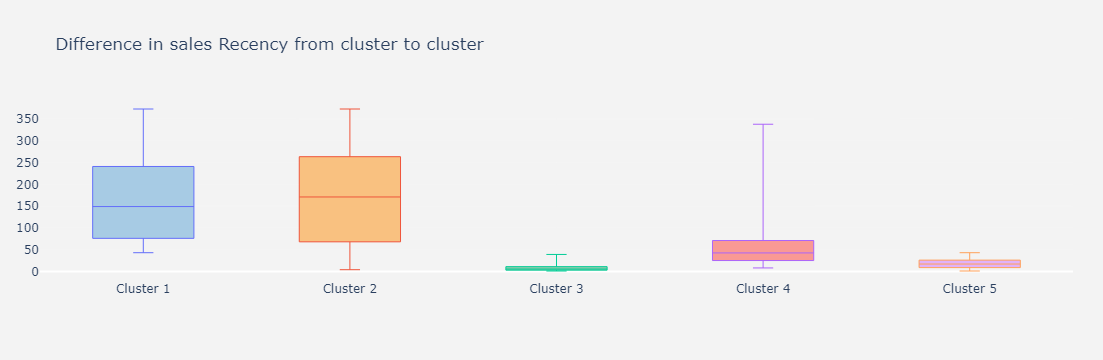

In [84]:
import plotly as py
import plotly.graph_objs as go
py.offline.init_notebook_mode()

x_data=['Cluster 1','Cluster 2','Cluster 3','Cluster 4','Cluster 5']
cutoff_quantile=100
field_to_plot='Recency'
y0 = customer_history_data[customer_history_data['num_cluster5_labels']==0][field_to_plot].values
y0 = y0[y0<np.percentile(y0, cutoff_quantile)]
y1=customer_history_data[customer_history_data['num_cluster5_labels']==1][field_to_plot].values
y1=y1[y1<np.percentile(y1,cutoff_quantile)]
y2 = customer_history_data[customer_history_data['num_cluster5_labels']==2][field_to_plot].values
y2 = y2[y2<np.percentile(y2, cutoff_quantile)]
y3 = customer_history_data[customer_history_data['num_cluster5_labels']==3][field_to_plot].values
y3 = y3[y3<np.percentile(y3, cutoff_quantile)]
y4 = customer_history_data[customer_history_data['num_cluster5_labels']==4][field_to_plot].values
y4 = y4[y4<np.percentile(y4, cutoff_quantile)]
y_data=[y0,y1,y2,y3,y4]

colors = ['rgba(93, 164, 214, 0.5)', 'rgba(255, 144, 14, 0.5)', 'rgba(44, 160, 101, 0.5)', 'rgba(255, 65, 54, 0.5)',
          'rgba(207, 114, 255, 0.5)', 'rgba(127, 96, 0, 0.5)']
traces=[]

for xd,yd,cls in zip(x_data,y_data,colors):
    traces.append(go.Box(y=yd,
                         name=xd,
                         boxpoints=False,
                         jitter=0.5,
                         whiskerwidth=0.2,
                         fillcolor=cls,
                         marker=dict(size=2,),
                         line=dict(width=1),
                        ))
layout=go.Layout(
title='Difference in sales {} from cluster to cluster'.format(field_to_plot),
yaxis=dict(autorange=True,
           showgrid=True,
           zeroline=True,
           dtick=50,
           gridcolor='rgb(255, 255, 255)',
           gridwidth=0.1,
           zerolinecolor='rgb(255,255,255)',
           zerolinewidth=2,),
margin=dict(
    l=40,
    r=30,
    b=80,
    t=100,
),
paper_bgcolor='rgb(243, 243, 243)',
plot_bgcolor='rgb(243, 243, 243)',
showlegend=False
)
fig=go.Figure(data=traces,layout=layout)
py.offline.iplot(fig)


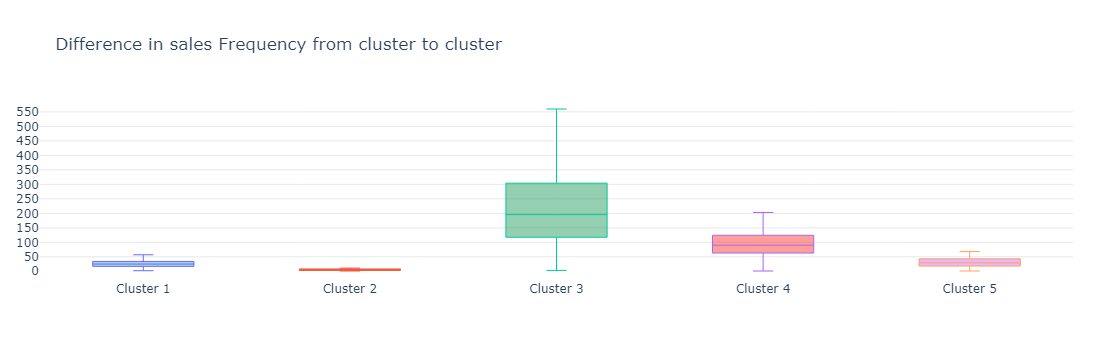

In [86]:
import plotly as py
import plotly.graph_objs as go
py.offline.init_notebook_mode()

x_data = ['Cluster 1','Cluster 2','Cluster 3','Cluster 4', 'Cluster 5']
cutoff_quantile = 90
field_to_plot = 'Frequency'

y0 = customer_history_data[customer_history_data['num_cluster5_labels']==0][field_to_plot].values
y0 = y0[y0<np.percentile(y0, cutoff_quantile)]
y1 = customer_history_data[customer_history_data['num_cluster5_labels']==1][field_to_plot].values
y1 = y1[y1<np.percentile(y1, cutoff_quantile)]
y2 = customer_history_data[customer_history_data['num_cluster5_labels']==2][field_to_plot].values
y2 = y2[y2<np.percentile(y2, cutoff_quantile)]
y3 = customer_history_data[customer_history_data['num_cluster5_labels']==3][field_to_plot].values
y3 = y3[y3<np.percentile(y3, cutoff_quantile)]
y4 = customer_history_data[customer_history_data['num_cluster5_labels']==4][field_to_plot].values
y4 = y4[y4<np.percentile(y4, cutoff_quantile)]
y_data = [y0,y1,y2,y3,y4]

colors = ['rgba(93, 164, 214, 0.5)', 'rgba(255, 144, 14, 0.5)', 'rgba(44, 160, 101, 0.5)', 'rgba(255, 65, 54, 0.5)', 'rgba(207, 114, 255, 0.5)', 'rgba(127, 96, 0, 0.5)']
traces = []

for xd, yd, cls in zip(x_data, y_data, colors):
        traces.append(go.Box(
            y=yd,
            name=xd,
            boxpoints=False,
            jitter=0.5,
            whiskerwidth=0.2,
            fillcolor=cls,
            marker=dict(
                size=2,
            ),
            line=dict(width=1),
        ))

layout = go.Layout(
    title='Difference in sales {} from cluster to cluster'.format(field_to_plot),
    yaxis=dict(
        autorange=True,
        showgrid=True,
        zeroline=True,
        dtick=50,
        gridcolor='black',
        gridwidth=0.1,
        zerolinecolor='rgb(255, 255, 255)',
        zerolinewidth=2,
    ),
    margin=dict(
        l=40,
        r=30,
        b=80,
        t=100,
    ),
    paper_bgcolor='white',
    plot_bgcolor='white',
    showlegend=False
)

fig = go.Figure(data=traces, layout=layout)
py.offline.iplot(fig)

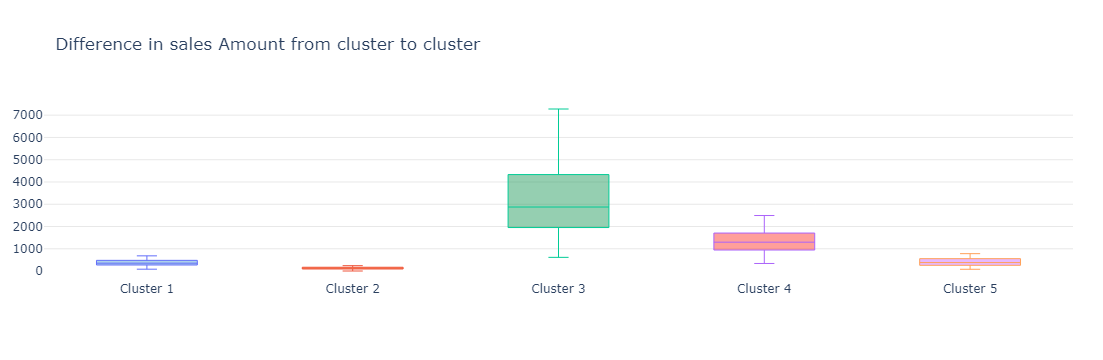

In [87]:
x_data = ['Cluster 1','Cluster 2','Cluster 3','Cluster 4', 'Cluster 5']
cutoff_quantile = 80
field_to_plot = 'Amount'
y0 = customer_history_data[customer_history_data['num_cluster5_labels']==0][field_to_plot].values
y0 = y0[y0<np.percentile(y0, cutoff_quantile)]
y1 = customer_history_data[customer_history_data['num_cluster5_labels']==1][field_to_plot].values
y1 = y1[y1<np.percentile(y1, cutoff_quantile)]
y2 = customer_history_data[customer_history_data['num_cluster5_labels']==2][field_to_plot].values
y2 = y2[y2<np.percentile(y2, cutoff_quantile)]
y3 = customer_history_data[customer_history_data['num_cluster5_labels']==3][field_to_plot].values
y3 = y3[y3<np.percentile(y3, cutoff_quantile)]
y4 = customer_history_data[customer_history_data['num_cluster5_labels']==4][field_to_plot].values
y4 = y4[y4<np.percentile(y4, cutoff_quantile)]
y_data = [y0,y1,y2,y3,y4]

colors = ['rgba(93, 164, 214, 0.5)', 'rgba(255, 144, 14, 0.5)', 'rgba(44, 160, 101, 0.5)', 'rgba(255, 65, 54, 0.5)', 'rgba(207, 114, 255, 0.5)', 'rgba(127, 96, 0, 0.5)']
traces = []

for xd, yd, cls in zip(x_data, y_data, colors):
        traces.append(go.Box(
            y=yd,
            name=xd,
            boxpoints=False,
            jitter=0.5,
            whiskerwidth=0.2,
            fillcolor=cls,
            marker=dict(
                size=2,
            ),
            line=dict(width=1),
        ))

layout = go.Layout(
    title='Difference in sales {} from cluster to cluster'.format(field_to_plot),
    yaxis=dict(
        autorange=True,
        showgrid=True,
        zeroline=True,
        dtick=1000,
        gridcolor='black',
        gridwidth=0.1,
        zerolinecolor='rgb(255, 255, 255)',
        zerolinewidth=2,
    ),
    margin=dict(
        l=40,
        r=30,
        b=80,
        t=100,
    ),
    paper_bgcolor='white',
    plot_bgcolor='white',
    showlegend=False
)

fig = go.Figure(data=traces, layout=layout)
py.offline.iplot(fig)

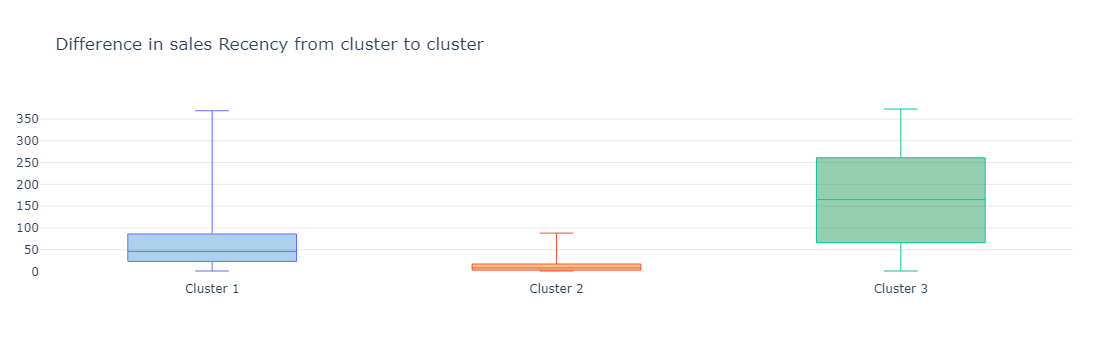

In [88]:
x_data = ['Cluster 1','Cluster 2','Cluster 3']
cutoff_quantile = 100
field_to_plot = 'Recency'
y0 = customer_history_data[customer_history_data['num_cluster3_labels']==0][field_to_plot].values
y0 = y0[y0<np.percentile(y0, cutoff_quantile)]
y1 = customer_history_data[customer_history_data['num_cluster3_labels']==1][field_to_plot].values
y1 = y1[y1<np.percentile(y1, cutoff_quantile)]
y2 = customer_history_data[customer_history_data['num_cluster3_labels']==2][field_to_plot].values
y2 = y2[y2<np.percentile(y2, cutoff_quantile)]

y_data = [y0,y1,y2]

colors = ['rgba(93, 164, 214, 0.5)', 'rgba(255, 144, 14, 0.5)',
          'rgba(44, 160, 101, 0.5)', 'rgba(255, 65, 54, 0.5)', 'rgba(207, 114, 255, 0.5)', 'rgba(127, 96, 0, 0.5)']
traces = []

for xd, yd, cls in zip(x_data, y_data, colors):
        traces.append(go.Box(
            y=yd,
            name=xd,
            boxpoints=False,
            jitter=0.5,
            whiskerwidth=0.2,
            fillcolor=cls,
            marker=dict(
                size=2,
            ),
            line=dict(width=1),
        ))

layout = go.Layout(
    title='Difference in sales {} from cluster to cluster'.format(field_to_plot),
    yaxis=dict(
        autorange=True,
        showgrid=True,
        zeroline=True,
        dtick=50,
        gridcolor='black',
        gridwidth=0.1,
        zerolinecolor='rgb(255, 255, 255)',
        zerolinewidth=2,
    ),
    margin=dict(
        l=40,
        r=30,
        b=80,
        t=100,
    ),
    plot_bgcolor='white',
    showlegend=False
)

fig = go.Figure(data=traces, layout=layout)
py.offline.iplot(fig)

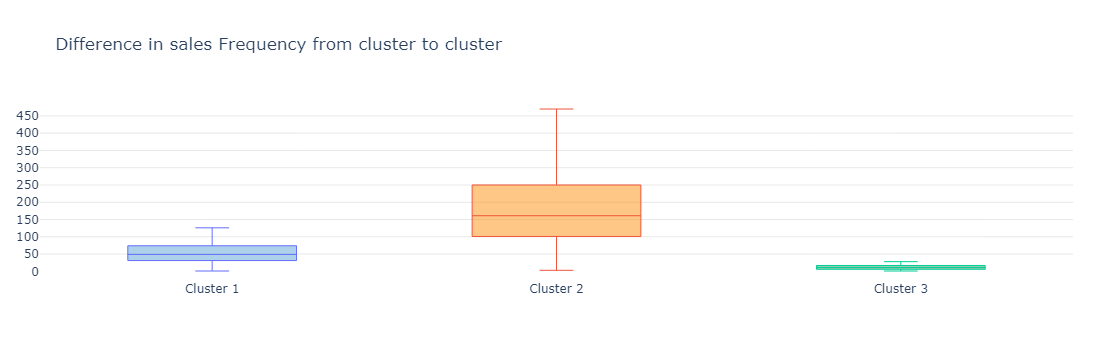

In [89]:
x_data = ['Cluster 1','Cluster 2','Cluster 3']
cutoff_quantile = 90
field_to_plot = 'Frequency'
y0 = customer_history_data[customer_history_data['num_cluster3_labels']==0][field_to_plot].values
y0 = y0[y0<np.percentile(y0, cutoff_quantile)]
y1 = customer_history_data[customer_history_data['num_cluster3_labels']==1][field_to_plot].values
y1 = y1[y1<np.percentile(y1, cutoff_quantile)]
y2 = customer_history_data[customer_history_data['num_cluster3_labels']==2][field_to_plot].values
y2 = y2[y2<np.percentile(y2, cutoff_quantile)]

y_data = [y0,y1,y2]

colors = ['rgba(93, 164, 214, 0.5)', 'rgba(255, 144, 14, 0.5)', 'rgba(44, 160, 101, 0.5)', 'rgba(255, 65, 54, 0.5)', 'rgba(207, 114, 255, 0.5)', 'rgba(127, 96, 0, 0.5)']
traces = []

for xd, yd, cls in zip(x_data, y_data, colors):
        traces.append(go.Box(
            y=yd,
            name=xd,
            boxpoints=False,
            jitter=0.5,
            whiskerwidth=0.2,
            fillcolor=cls,
            marker=dict(
                size=2,
            ),
            line=dict(width=1),
        ))

layout = go.Layout(
    title='Difference in sales {} from cluster to cluster'.format(field_to_plot),
    yaxis=dict(
        autorange=True,
        showgrid=True,
        zeroline=True,
        dtick=50,
        gridcolor='black',
        gridwidth=0.1,
        zerolinecolor='rgb(255, 255, 255)',
        zerolinewidth=2,
    ),
    margin=dict(
        l=40,
        r=30,
        b=80,
        t=100,
    ),
    plot_bgcolor='white',
    showlegend=False
)

fig = go.Figure(data=traces, layout=layout)
py.offline.iplot(fig)

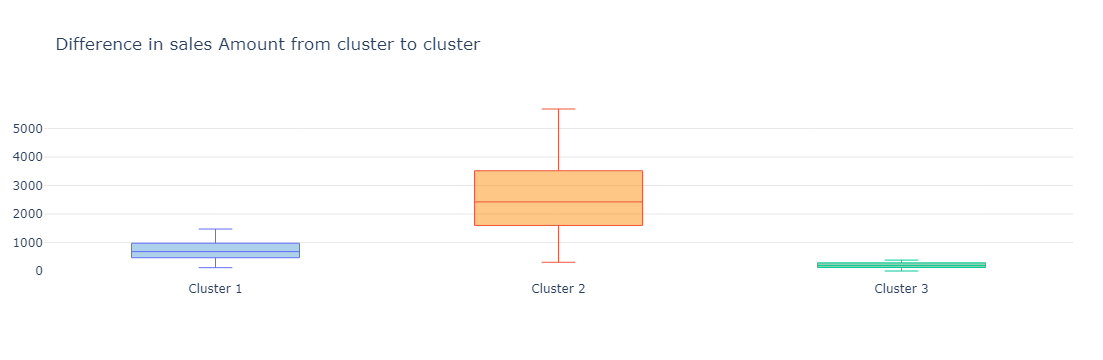

In [90]:
x_data = ['Cluster 1','Cluster 2','Cluster 3']
cutoff_quantile = 80
field_to_plot = 'Amount'
y0 = customer_history_data[customer_history_data['num_cluster3_labels']==0][field_to_plot].values
y0 = y0[y0<np.percentile(y0, cutoff_quantile)]
y1 = customer_history_data[customer_history_data['num_cluster3_labels']==1][field_to_plot].values
y1 = y1[y1<np.percentile(y1, cutoff_quantile)]
y2 = customer_history_data[customer_history_data['num_cluster3_labels']==2][field_to_plot].values
y2 = y2[y2<np.percentile(y2, cutoff_quantile)]

y_data = [y0,y1,y2]

colors = ['rgba(93, 164, 214, 0.5)', 'rgba(255, 144, 14, 0.5)', 'rgba(44, 160, 101, 0.5)', 'rgba(255, 65, 54, 0.5)', 'rgba(207, 114, 255, 0.5)', 'rgba(127, 96, 0, 0.5)']
traces = []

for xd, yd, cls in zip(x_data, y_data, colors):
        traces.append(go.Box(
            y=yd,
            name=xd,
            boxpoints=False,
            jitter=0.5,
            whiskerwidth=0.2,
            fillcolor=cls,
            marker=dict(
                size=2,
            ),
            line=dict(width=1),
        ))

layout = go.Layout(
    title='Difference in sales {} from cluster to cluster'.format(field_to_plot),
    yaxis=dict(
        autorange=True,
        showgrid=True,
        zeroline=True,
        dtick=1000,
        gridcolor='black',
        gridwidth=0.1,
        zerolinecolor='rgb(255, 255, 255)',
        zerolinewidth=2,
    ),
    margin=dict(
        l=40,
        r=30,
        b=80,
        t=100,
    ),
    plot_bgcolor='white',
    showlegend=False
)

fig = go.Figure(data=traces, layout=layout)
py.offline.iplot(fig)